In [105]:
import pandas as pd
import matplotlib as ml
import numpy as np
import math as mt
import pprint
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
pp = pprint.PrettyPrinter(width=1000, compact=True)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',50)


In [106]:
#Lendo os dados
dados=pd.read_csv("C:/Users/Roger/OneDrive/ESPECIAL/IA006/python/dados_voz_genero.csv")
dados.head(10)

,Unnamed: 0,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1.0
1,1,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1.0
2,2,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1.0
3,3,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1.0
4,4,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1.0
5,5,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,1.0
6,6,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,1.0
7,7,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,1.0
8,8,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,1.0
9,9,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,0.011699,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,1.0


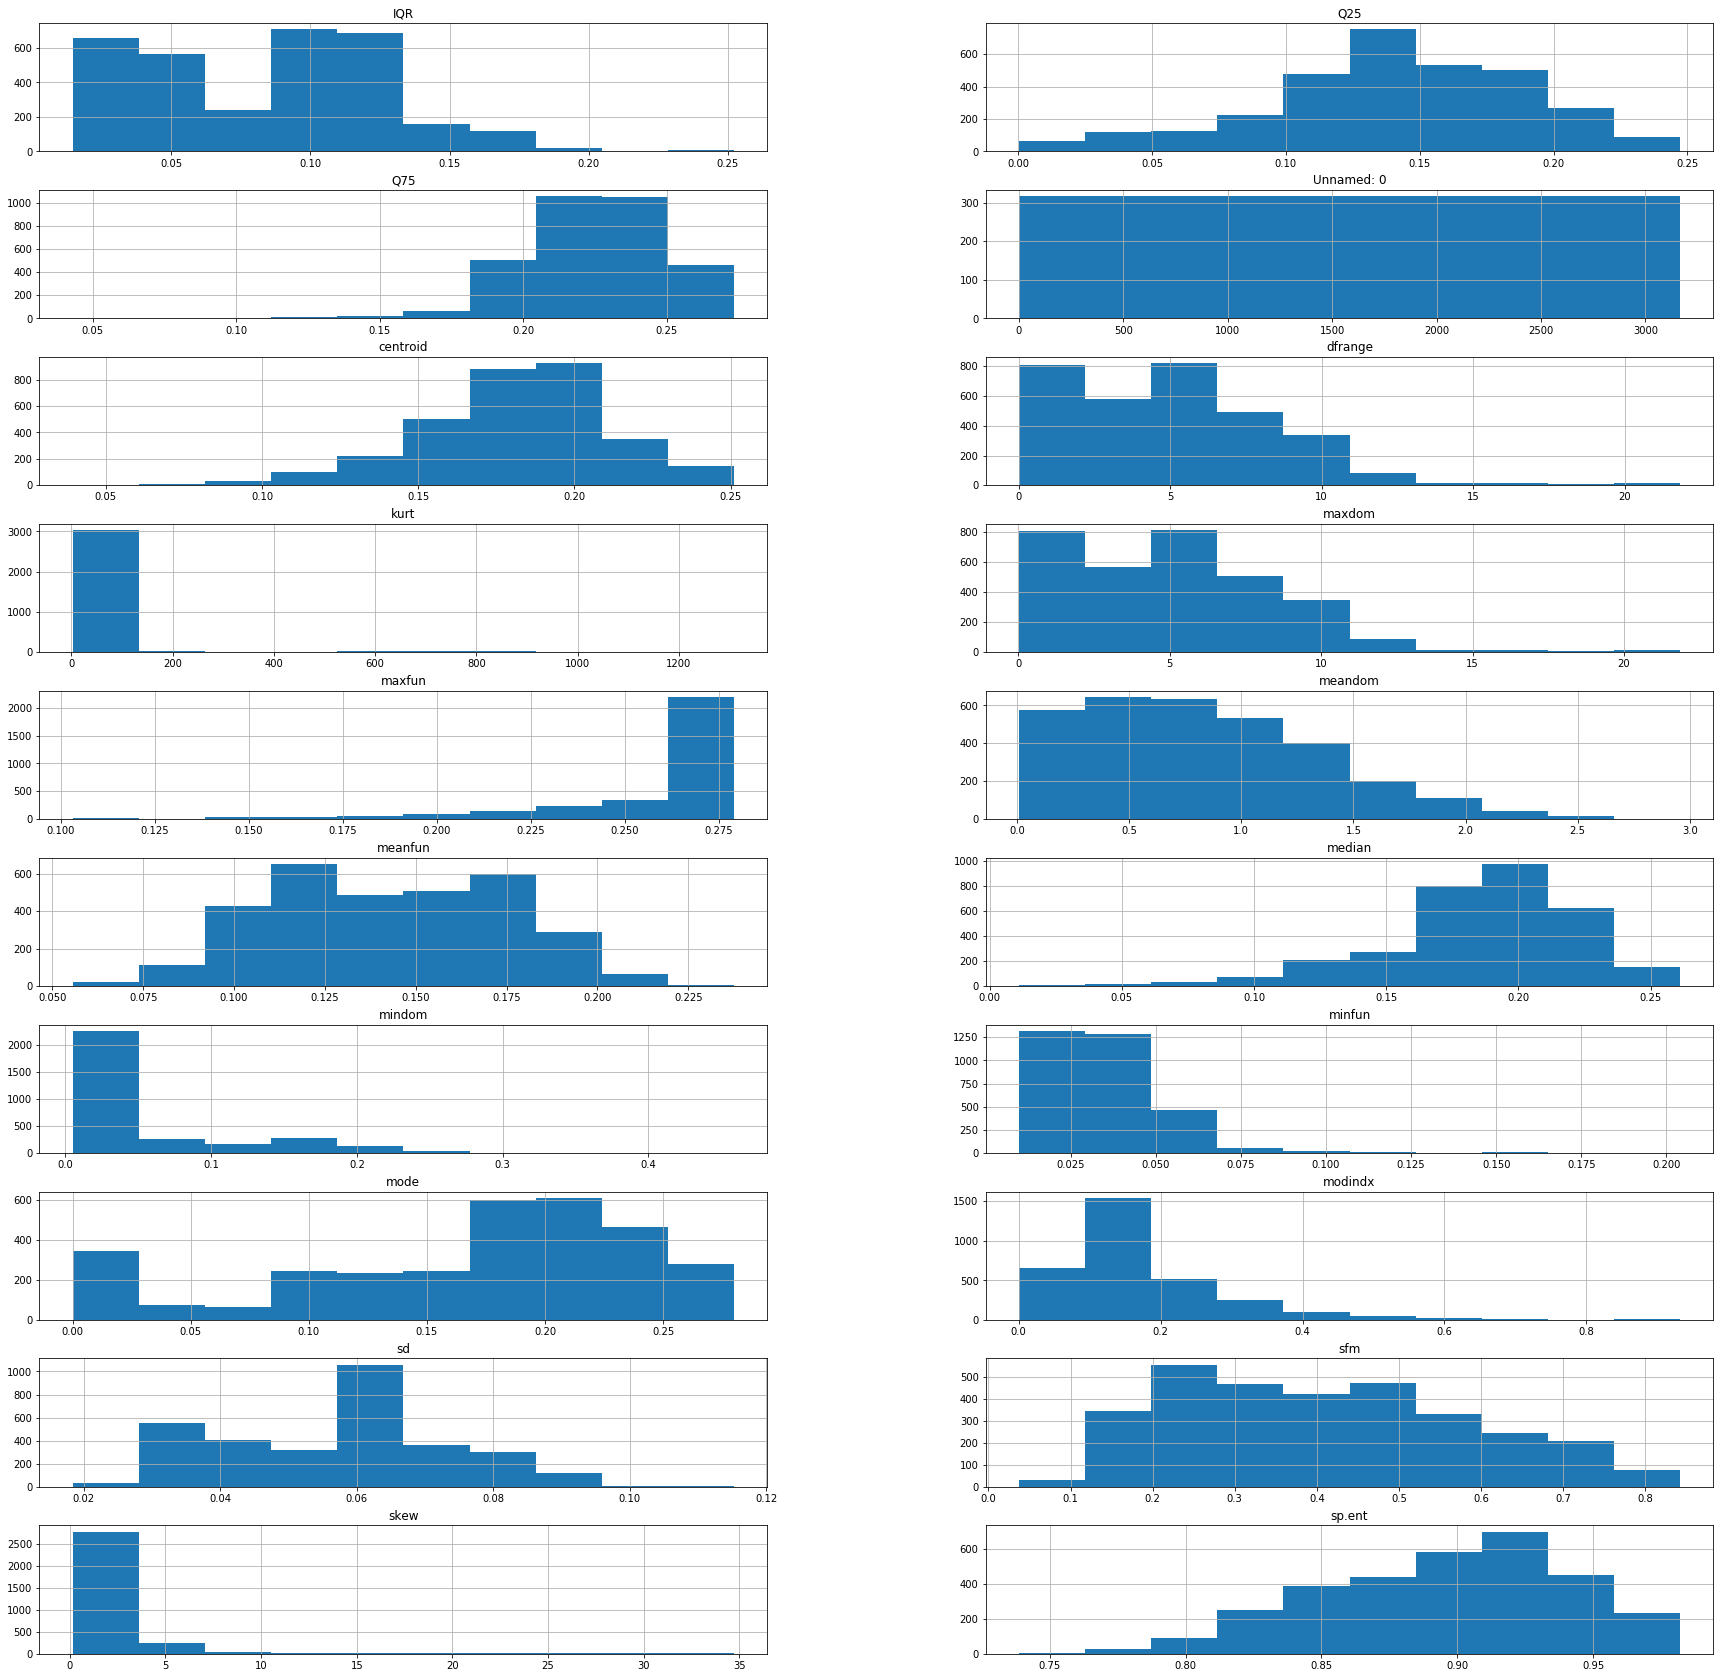

In [5]:
#Histogramas
#selecionando todas as variaveis(sem a ultima linha)
histograma=dados.iloc[:,:-1].copy()
columns = list(histograma)
plot_rows = int(len(columns) / 2)
if(len(columns) % 2 != 0):
    plot_rows = plot_rows + 1
fig1, axs = plt.subplots(plot_rows, 2, figsize=(30,30))
histograma.hist(ax=axs)
plt.show()

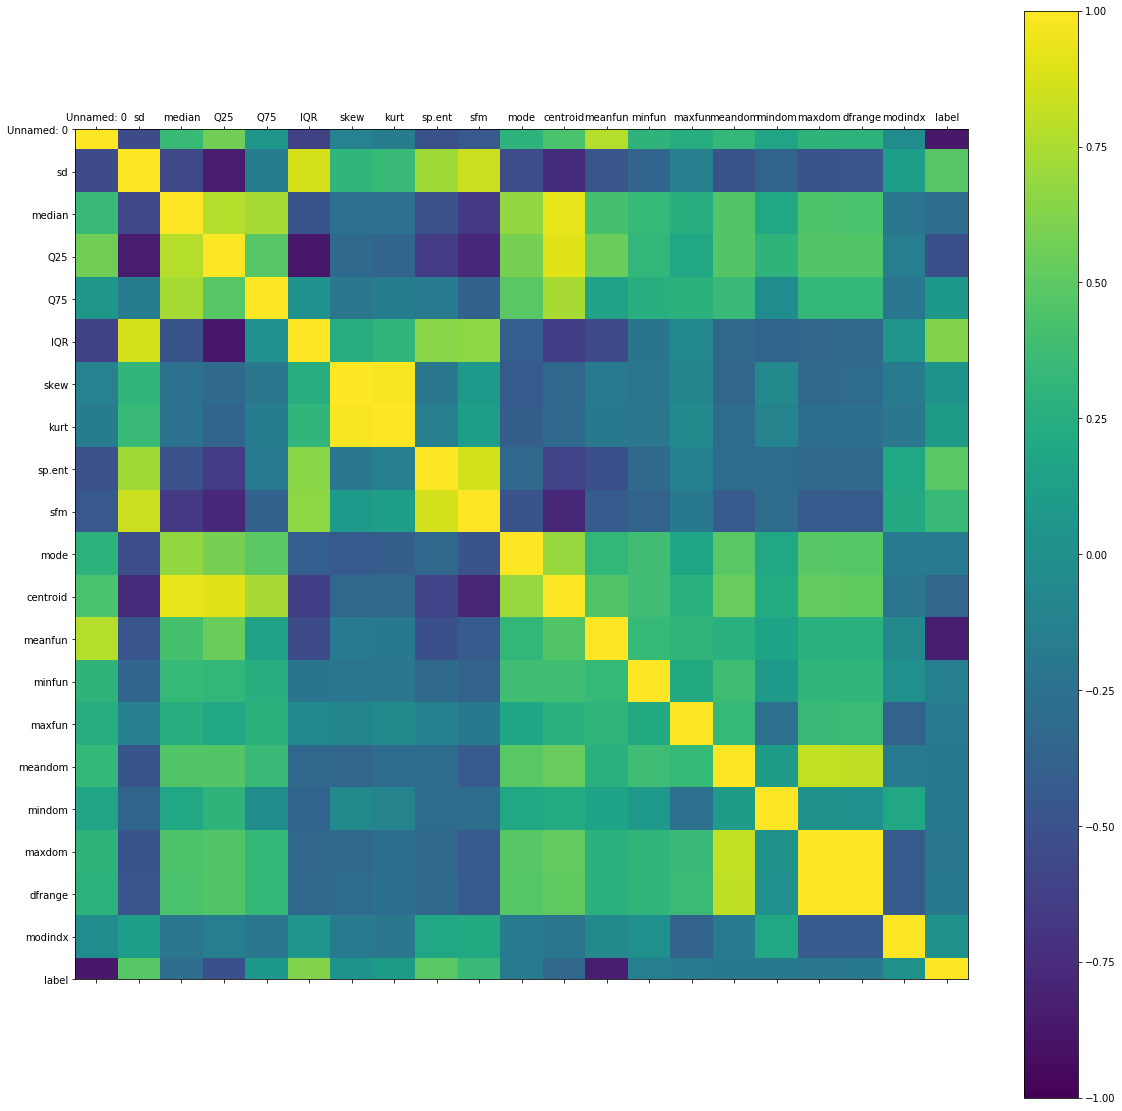

In [4]:
#Mostrando a matrix de correlação
correlations = dados.corr()
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,21,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dados.columns)
ax.set_yticklabels(dados.columns)
plt.show()

In [18]:
#Outra opção de matrix de correlação
corr = dados.iloc[:,1:].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
sd,1,-0.56,-0.85,-0.16,0.87,0.31,0.35,0.72,0.84,-0.53,-0.74,-0.47,-0.35,-0.13,-0.48,-0.36,-0.48,-0.48,0.12,0.48
median,-0.56,1,0.77,0.73,-0.48,-0.26,-0.24,-0.5,-0.66,0.68,0.93,0.41,0.34,0.25,0.46,0.19,0.44,0.44,-0.21,-0.28
Q25,-0.85,0.77,1,0.48,-0.87,-0.32,-0.35,-0.65,-0.77,0.59,0.91,0.55,0.32,0.2,0.47,0.3,0.46,0.45,-0.14,-0.51
Q75,-0.16,0.73,0.48,1,0.0096,-0.21,-0.15,-0.17,-0.38,0.49,0.74,0.16,0.26,0.29,0.36,-0.024,0.34,0.34,-0.22,0.067
IQR,0.87,-0.48,-0.87,0.0096,1,0.25,0.32,0.64,0.66,-0.4,-0.63,-0.53,-0.22,-0.07,-0.33,-0.36,-0.34,-0.33,0.041,0.62
skew,0.31,-0.26,-0.32,-0.21,0.25,1,0.98,-0.2,0.08,-0.43,-0.32,-0.17,-0.22,-0.081,-0.34,-0.062,-0.31,-0.3,-0.17,0.037
kurt,0.35,-0.24,-0.35,-0.15,0.32,0.98,1,-0.13,0.11,-0.41,-0.32,-0.19,-0.2,-0.046,-0.3,-0.1,-0.27,-0.27,-0.21,0.087
sp.ent,0.72,-0.5,-0.65,-0.17,0.64,-0.2,-0.13,1,0.87,-0.33,-0.6,-0.51,-0.31,-0.12,-0.29,-0.29,-0.32,-0.32,0.2,0.49
sfm,0.84,-0.66,-0.77,-0.38,0.66,0.08,0.11,0.87,1,-0.49,-0.78,-0.42,-0.36,-0.19,-0.43,-0.29,-0.44,-0.43,0.21,0.36
mode,-0.53,0.68,0.59,0.49,-0.4,-0.43,-0.41,-0.33,-0.49,1,0.69,0.32,0.39,0.17,0.49,0.2,0.48,0.47,-0.18,-0.17


In [109]:


#Standarlizando os dados
def dataframe_stand(x):
  return (x-x.mean(axis=0))/x.std(axis=0)

dados_stand=dataframe_stand(dados).copy()

#Como a coluna label se modifica ficando com um certo ruido voltamos a original, e adicionamos a coluna de "1"
dados_stand.drop(columns=['label'],inplace=True)
dados_stand['C']=1
dados_stand['label']=dados['label'].copy()
dados_stand=dados_stand.iloc[:,1:].copy()
dados_stand['meanfun'].head()

0   -1.811752
1   -1.079424
2   -1.365152
3   -1.666703
4   -1.127056
Name: meanfun, dtype: float64

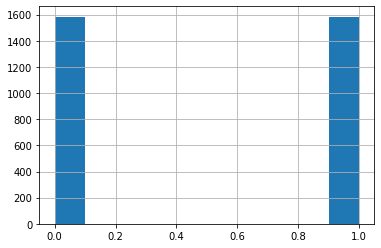

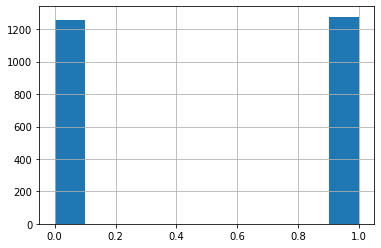

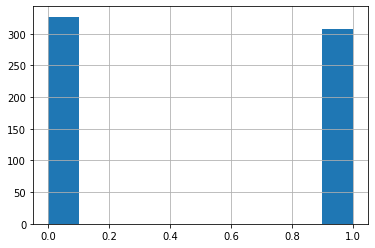

In [114]:
#Separando os dados em treino e teste
def treinoteste(dados,porcentagem):
    dados=dados.sample(frac=1).copy()
    numero_treino=len(dados)*porcentagem//100
    dados_treino=dados.iloc[:numero_treino]
    dados_teste=dados.iloc[numero_treino:]
    return dados_treino, dados_teste

#Separando em dados de treino e teste, a partir daqui não iremos trabalhar com dataframe.
dados_treino,dados_teste=treinoteste(dados_stand,80)

#Vendo como esta a distribuição das labels.
dados_stand['label'].hist()
plt.show()
dados_treino['label'].hist()
plt.show()
dados_teste['label'].hist()
plt.show()

#Convertendo para array
dados_treino=dados_treino[['meanfun','C','label']].values.copy()
dados_teste=dados_teste[['meanfun','C','label']].values.copy()

#seleção de x e y
x_treino=dados_treino[:,:-1].copy()
y_treino=dados_treino[:,-1].copy()
x_teste=dados_teste[:,:-1].copy()
y_teste=dados_teste[:,-1].copy()

In [115]:
#Funções Diversas
#calculo da estimativa
def yh_func(x,w):
    #Nunca da zero no denominador
    yh=1/(np.exp(np.dot(x,np.transpose(w)))+1)
    return yh


#calculo do gradiene
def grad_func(y,yh,x):
    grad=np.dot(np.transpose(y-yh),x)/len(x)
    return grad

#calculo do treshold
def threshold_func(y,t):
    z=y.copy()
    for k in range(0,len(z)):
        if z[k]>t:
            z[k]=1
        if z[k]<=t:
            z[k]=0
    return z

#Função para o gradiente descendente
def logistic_train_func(w_antigo,x,y,threshold,use_treshold):
#     w é um vetor inicial
    custo_lista=[]
    yh_antigo=yh_func(x,w_antigo)
    custo_antigo=log_loss(y,yh_antigo)
    custo_lista.append(custo_antigo)
    for i in range(1,max_iteracoes+1):
        w_novo=w_antigo-passo*grad_func(y,yh_antigo,x) 
        yh_novo=yh_func(x,w_novo)
        if use_treshold==1:
            yh_novo=threshold_func(yh_novo,threshold)
        custo_novo=log_loss(y,yh_novo)
        custo_lista.append(custo_novo)
        if abs(custo_novo-custo_antigo)<precisao_parada:
            mensagem="Parado por precisão."
            break;
        if i==max_iteracoes:
            mensagem="Parado por número de Iterações."
            break;
        custo_antigo=custo_novo
        yh_antigo=yh_novo
        w_antigo=w_novo
    return custo_lista,w_novo,custo_novo,abs(custo_antigo-custo_novo),i,mensagem


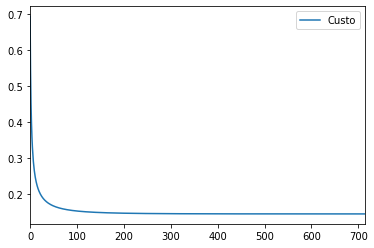

In [116]:
#Dados gerais
passo=1
max_iteracoes=714
precisao_parada=0.00000001

#Inicializando um vetor aleatório para começar o procedimento
w=np.zeros(2)

#Achando nosso w, sem usar threshold dentro da função
grafico_custo,w_final,custo_final,precisao,i,mensagem=logistic_train_func(w,x_treino,y_treino,0.5,0)

#Olhando a evolução do custo
grafico_custo=pd.DataFrame(grafico_custo,columns=['Custo'])
grafico_custo.plot()
plt.show()

# #Estimando o  após achar o w.
# yh_teste=yh_func(x_teste,w_final)
# #Dando uma olhada  no histograma antes de aplicar o threshold
# pd.DataFrame(yh_teste,columns=['Teste']).hist(bins=20)
# plt.show()
# #Aplicando o threshold
# yh_teste=threshold_func(yh_teste,0.5)
# #Dando uma olhada no histograma após aplicar o threshold
# pd.DataFrame(yh_teste,columns=['Treino']).hist(bins=20)
# plt.show()

# #Achando a amtrix de confusão do teste
# print("teste")
# print("tn, fp, fn, tp")
# print(confusion_matrix(y_teste, yh_teste).ravel()/len(y_teste)*100)



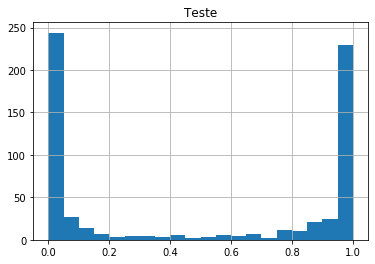

c:\users\roger\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in longlong_scalars


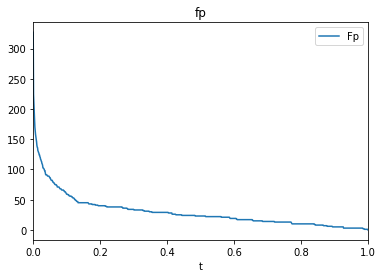

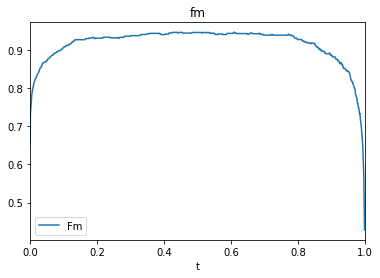

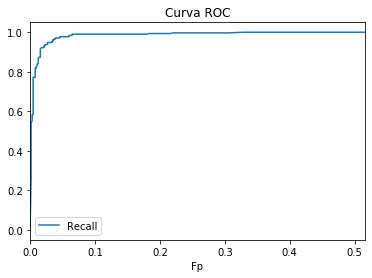

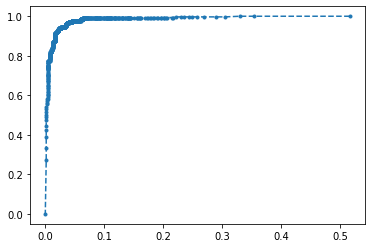

          t        fm
999   0.999  0.428571
998   0.998  0.497561
997   0.997  0.560748
996   0.996  0.593607
995   0.995  0.612613
...     ...       ...
434   0.434  0.946032
609   0.609  0.946341
611   0.611  0.946341
610   0.610  0.946341
1000  1.000       NaN

[1001 rows x 2 columns]
[6.10638319 0.19140507]


In [118]:

#Dados gerais
step=0.001

# #Inicializando um vetor aleatório para começar o procedimento
# w=np.zeros(20)
# grafico_custo,w_final,custo_final,precisao,i,mensagem=logistic_train_func(w,x_treino,y_treino,0.5,0)
yh_teste=yh_func(x_teste,w_final)

#Dando uma olhada no treshold dos resultados antes de aplicar o threshold.
pd.DataFrame(yh_teste,columns=['Teste']).hist(bins=20)
plt.show()


lis_treshold=np.arange(0,1+step,step)
# print(lis_treshold)
roc=[]
fp_grafico=[]
fm_grafico=[]
# print("tn, fp, fn, tp")
for t in lis_treshold:
    yh_teste_t=threshold_func(yh_teste,t)
    tn, fp, fn, tp=confusion_matrix(y_teste, yh_teste_t).ravel()
#     print(confusion_matrix(y_teste, yh_teste_t))
#     print(confusion_matrix(y_teste, yh_teste_t).ravel())
    recall=tp/(tp+fn)
#     print("recall")
#     print(recall)
    fp_p=fp/len(y_teste)
    roc.append([recall,fp_p])
    fp_grafico.append([t,fp])
    precision=tp/(tp+fp)
#     print("precision")
#     print(precision)
    fm=2*recall*precision/(recall+precision)
    fm_grafico.append([t,fm])

# Curva fp
grafico_fp=pd.DataFrame(fp_grafico,columns=['t','Fp'])
grafico_fp.plot(x='t',y='Fp',title="fp")
plt.show() 



# Curva fm
grafico_fm=pd.DataFrame(fm_grafico,columns=['t','Fm'])
grafico_fm.plot(x='t',y='Fm',title="fm")
plt.show()  
# print(fm_grafico)   
    
# Um tipo de curva ROC
grafico_roc=pd.DataFrame(roc,columns=['Recall','Fp'])
grafico_roc.plot(x='Fp',y='Recall',title="Curva ROC")
plt.show()

#Outro tipo de curva ROC
x=np.array(roc)
x=x[:,1].copy()
y=np.array(roc)
y=y[:,0].copy()
plt.plot(x,y,'.--')
plt.show()

# Achando o maior valor da fmedida
fm_dataframe=pd.DataFrame(np.array(fm_grafico),columns=['t','fm'])
print(fm_dataframe.sort_values(by=['fm']))
print(w_final)

In [121]:
# #Aplicando o threshold
yh_teste_t=threshold_func(yh_teste,0.61)
#Dando uma olhada no histograma após aplicar o threshold

# #Achando a amtrix de confusão do teste
print("teste")
print("tn, fp, fn, tp")
print(confusion_matrix(y_teste, yh_teste_t).ravel())
from sklearn.metrics import classification_report
print(classification_report(y_teste, yh_teste_t))

teste
tn, fp, fn, tp
[310  17  16 291]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       327
         1.0       0.94      0.95      0.95       307

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



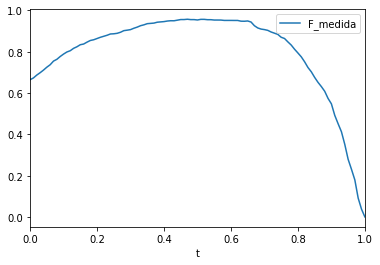

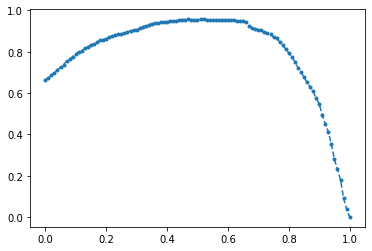

In [17]:
def division_zero(a, b):
    if b:
        x=a/b
    if b==0:
        x=0
    return x

lis_treshold=np.arange(0,1+step,step)
f_medida_lista=[]
for t in lis_treshold:
    yh_teste_t=threshold_func(yh_teste,t)
    tn, fp, fn, tp=confusion_matrix(y_teste, yh_teste_t).ravel()
    recall=division_zero(tp,(tp+fn))
    precisao=division_zero(tp,fp+tp)
    a=recall*precisao
    b=recall+precisao
    f_medida=2*division_zero(a,b)
    f_medida_lista.append([t, f_medida])

#Gráfico 1
grafico_f_medida=pd.DataFrame(f_medida_lista,columns=['t','F_medida'])
grafico_f_medida.plot(x='t',y='F_medida')
plt.show()

#Gráfico 2
x=np.array(f_medida_lista)
x=x[:,0].copy()
y=np.array(f_medida_lista)
y=y[:,1].copy()
plt.plot(x,y,'.--')
plt.show()

In [65]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [1, 1, 1, 0, 1, 1]
print("tn, fp, fn, tp")
print(confusion_matrix(y_true, y_pred).ravel())
print(confusion_matrix(y_true, y_pred))

tn, fp, fn, tp
[0 2 1 3]
[[0 2]
 [1 3]]


In [ ]:
#Daqui pra baixo é lixo

In [3]:


import sklearn as sk
from sklearn.linear_model import LogisticRegression
import pandas as pd

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(x_treino, y_treino)
yh_treino=LR.predict(x_treino)
yh_teste=LR.predict(x_teste)
print("treino")
print("tn, fp, fn, tp")
print(confusion_matrix(y_treino, yh_treino).ravel()/len(y_treino)*100)
print("teste")
print("tn, fp, fn, tp")
print(confusion_matrix(y_teste,yh_teste).ravel()/len(y_teste)*100)


def custo_func(y,yh):
#     custo=-np.sum(y_treino*np.log(yh_treino)+(1-y_treino)*np.log(1-yh_treino))/len(y)
#     return custo
    eps=1e-15
    custo=-
    yh = np.clip(yh, eps, 1 - eps)
    for i in range(0,len(y)):
        if y[i] == 1:
            custo+= -np.log(yh[i])
        else:
            custo+= -np.log(1 - yh[i])
    custo=custo/len(y)
    return custo


# teste
# import numpy as np
# from sklearn.model_selection import KFold

# X = np.array(["a", "b", "c", "d","e","f","g","h"])
# kf = KFold(n_splits=5)
# for train_index, test_index in kf.split(X):
#     print(train_index)
#     print(X[train_index])
#     print(test_index)
#     print(X[test_index])

# h=np.array([0,1,2])
# print(X[h])

#teste
# print(log_loss([1,0],[1,1]))
# print(1*np.log(1))

# algoritmo para logloss
def logloss(true_label, predicted, eps=1e-15):
  p = np.clip(predicted, eps, 1 - eps)
  print(p)
  if true_label == 1:
    return -np.log(p)
  else:
    return -np.log(1 - p)

#códigos legais
# print(x_treino.shape)
# print(w.shape[0])
# print(w.shape)
# print(len(w))



y_true = [0, 0, 1, 1]
y_pred = [0.0,0.9,0.1,0.7]
teste=0
for i in range(0,len(y_true)):
    teste+=logloss(y_true[i],y_pred[i])

teste=teste/len(y_true)
print(teste)
print(log_loss(y_true,y_pred))
np.log(0.000000000000000000000000000000000000001)

1e-15
0.9
0.1
0.7
1.240461282481706
1.240461282481706


-89.80081862676778

In [62]:
for i in range(0,10):
    print (i)
    if i==7:
        break

0
1
2
3
4
5
6
7
